# Dataset Description


### Overview

**The data has been split into two groups:**

  - training set (train.csv)
  - test set (test.csv)
    
1. **The training set** should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

2. **The test set** should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

*We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.*

## Data Dictionary
**pclass:** A proxy for socio-economic status (SES)
    - 1st = Upper
    - 2nd = Middle
    - 3rd = Lower
  
**age:** Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp:** The dataset defines family relations in this way...

- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

  
**parch:** The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.

## Explore Data

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [60]:
data_train=pd.read_csv(r'train.csv')
data_test=pd.read_csv(r'test.csv')

In [61]:
data_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
data_train.shape


(891, 12)

In [63]:
data_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [64]:
data_train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [65]:
data_train.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [66]:
null_data=data_train.isnull().sum()
null_data[null_data>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

<Axes: >

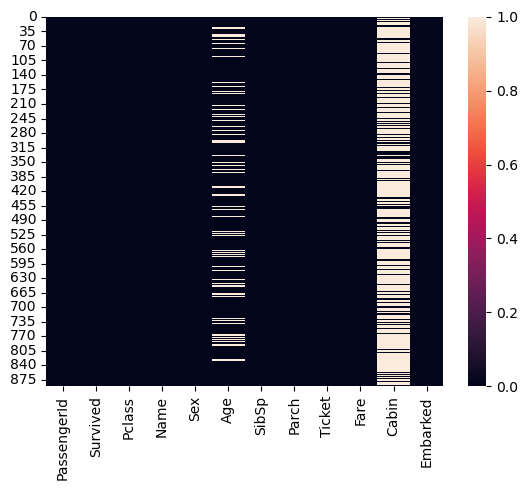

In [67]:
sns.heatmap(data_train.isnull())


## Clean data

In [68]:
def data_clean(d):
    d.drop(['Cabin','Name','Ticket', 'Fare','Embarked'],axis=1,inplace=True)
    d.Age=d.Age.fillna(d.Age.median())
    d.dropna()
    return d
data_clean(data_train)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0
...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0
887,888,1,1,female,19.0,0,0
888,889,0,3,female,28.0,1,2
889,890,1,1,male,26.0,0,0


In [69]:
data_clean(data_test)

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,male,34.5,0,0
1,893,3,female,47.0,1,0
2,894,2,male,62.0,0,0
3,895,3,male,27.0,0,0
4,896,3,female,22.0,1,1
...,...,...,...,...,...,...
413,1305,3,male,27.0,0,0
414,1306,1,female,39.0,0,0
415,1307,3,male,38.5,0,0
416,1308,3,male,27.0,0,0


<Axes: >

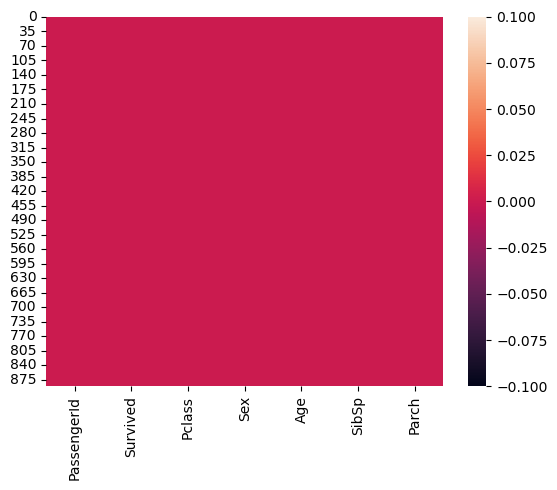

In [70]:
sns.heatmap(data_train.isnull())

## Data Analysis

<Axes: >

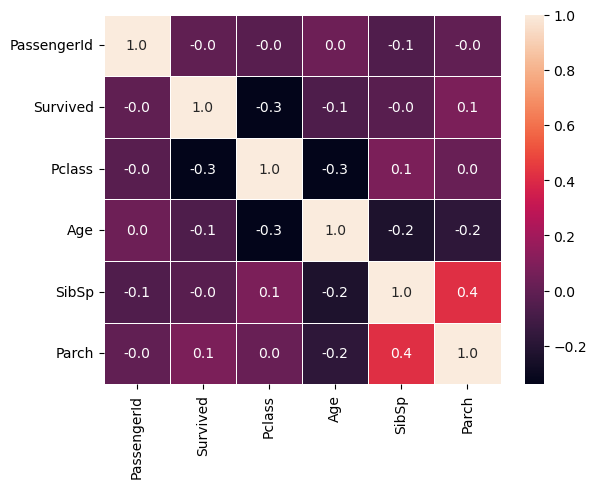

In [71]:
rel = data_train.select_dtypes(include=['number']).corr()
sns.heatmap(rel, annot=True, fmt='.1f', linewidths=0.5)
 ## العلاقة بين البيانات وبعضها

In [72]:
rel['Survived'].sort_values()

Pclass        -0.338481
Age           -0.064910
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Survived       1.000000
Name: Survived, dtype: float64

In [73]:
data_train.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: ylabel='count'>

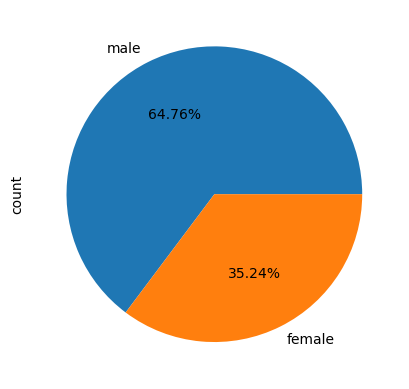

In [74]:
data_train.Sex.value_counts().plot.pie(autopct='%0.2f%%')

<Axes: xlabel='Sex', ylabel='count'>

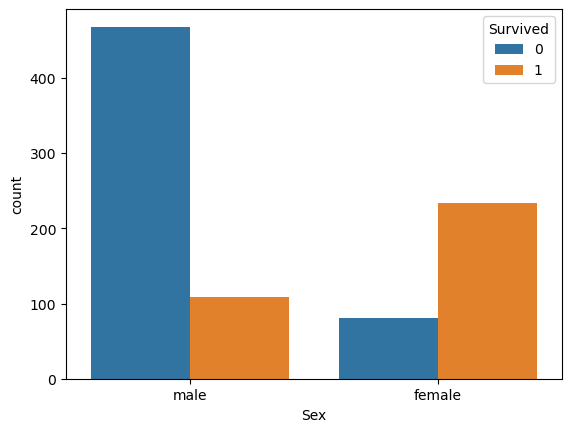

In [75]:
sns.countplot(x='Sex', data=data_train, hue='Survived')

# ٍSurvived from male and femal .. نسب الوفاة والحياة بناءا على جنس الركاب ( رجال ونساء )

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


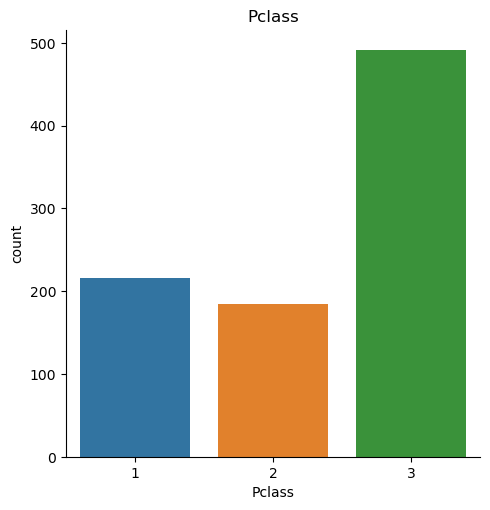

In [76]:
sns.catplot(x='Pclass', data=data_train, kind='count').set(title='Pclass')
plt.show()

<Axes: xlabel='Pclass', ylabel='count'>

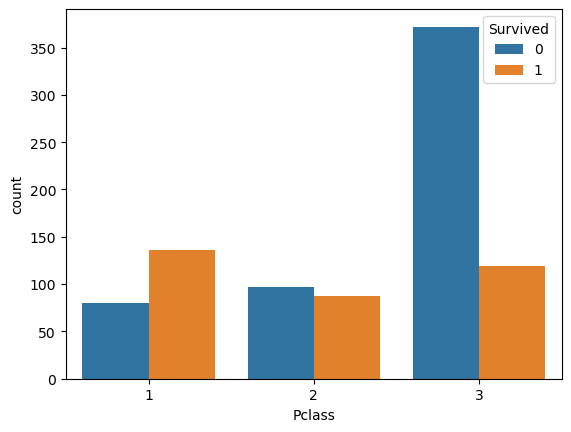

In [77]:
sns.countplot(x="Pclass",data=data_train,hue='Survived')

<Axes: xlabel='Age', ylabel='Count'>

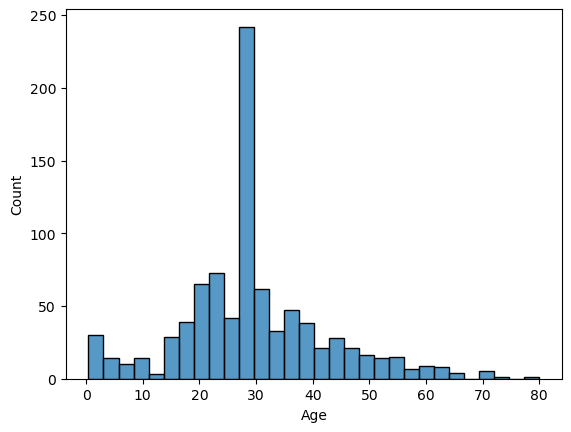

In [78]:
sns.histplot(data_train.Age)

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


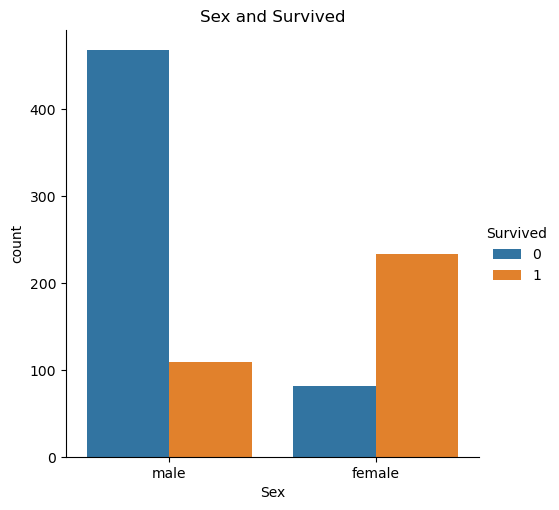

In [79]:
sns.catplot(x='Sex', hue='Survived', data=data_train, kind='count').set(title='Sex and Survived')
plt.show()

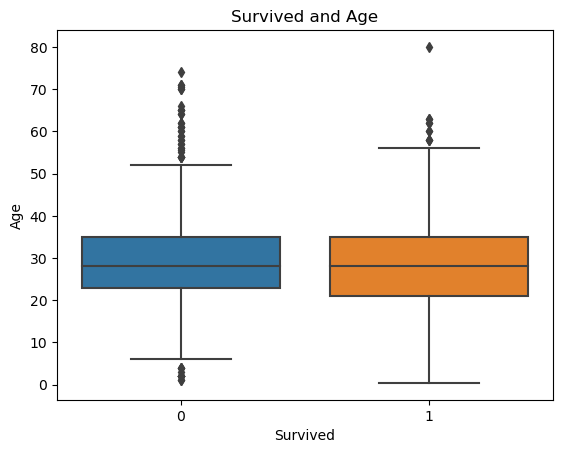

In [81]:
# Survived and Age
sns.boxplot(x='Survived', y='Age', data=data_train).set(title='Survived and Age')
plt.show()

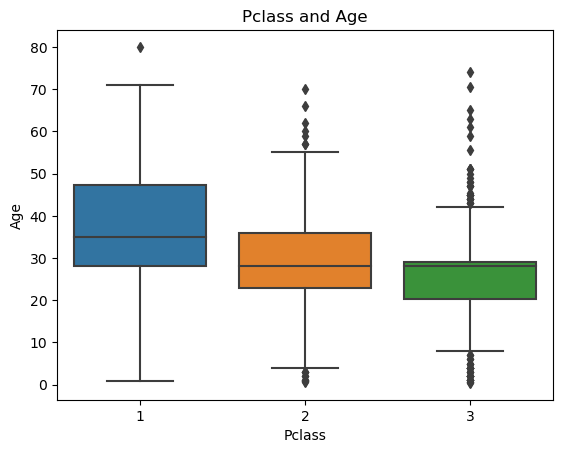

In [82]:
# Pclass and Age
sns.boxplot(x='Pclass', y='Age', data=data_train).set(title='Pclass and Age')
plt.show()

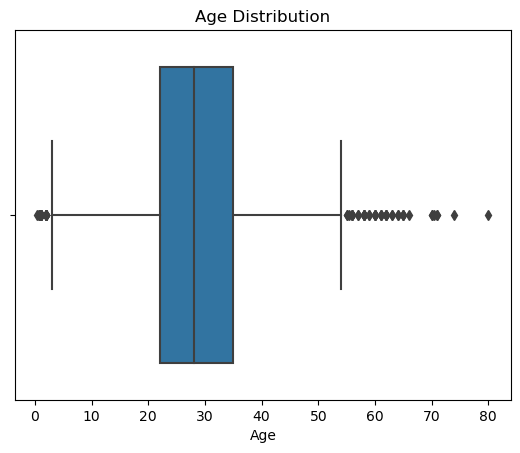

In [83]:
# checking Age for distribution and outliers
sns.boxplot(x='Age', data=data_train).set(title='Age Distribution')
plt.show()

##  Processing Data

In [85]:
data_train.Sex=pd.get_dummies(data_train.Sex,drop_first=True)
data_test.Sex=pd.get_dummies(data_test.Sex,drop_first=True)


In [86]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    bool   
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
dtypes: bool(1), float64(1), int64(5)
memory usage: 42.8 KB
